# Gradient Descent Optimization Algorithms

* [An overview of gradient descent optimization algorithms](http://sebastianruder.com/optimizing-gradient-descent/index.html#adadelta)
* [CS231 Gradient Descent](http://cs231n.github.io/optimization-1/)
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)
* [Optimization: Stochastic Gradient Descent](http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/)

### 다음과 같이 표기

* **Weights (parameters):** $ \theta $ 이며.. 이때 $ \theta \in R^d $  이다. 
* **Objective Function:** $ J(w) $ 
* **Gradient of the objective function:** $ \nabla_\theta J(\theta) $


### Import Libraries

In [160]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


### Data

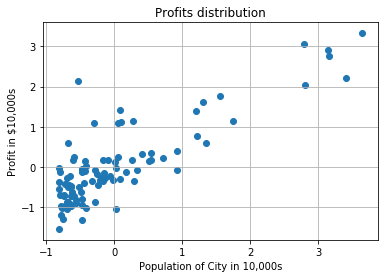

In [234]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)



scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
grid()

# Batch Gradient Descent

Gradient Descent를 할때 **전체 training dataset**을 사용해서 구합니다.<br>
<small style="color:#888888"> $ \nabla $ 는 derivativation을 가르키고, $ \Delta $ 는 차이점을 가르킴 </small>

$ \theta = \theta - \eta \cdot \nabla_\theta J( \theta) $

즉 weights(parameters) 한번을 업데이트 하기 위해서 **전체 dataset**을 다 돌려야 하기 때문에 매우 느리며, 메모리에 다 들어가지도 않는 경우가 많습니다. 또한 실시간으로 새로운 데이터가 입력되는 (on-the-fly)상황에서도 전체 데이터를 다 돌려야 하기때문에 적용을 할 수 없습니다.



아래는 참고로.. derivative of $ J(\theta) $ 했을때..

$$ \frac{\partial}{\partial \theta} = \Delta \theta =  \frac{2}{N} \sum^N_{i=1} -x_i(y_i - \sum_{j=0}(\theta_j x_j )) $$


$$ \frac{\partial}{\partial b} = \Delta b = \frac{2}{N} \sum^N_{i=1} -(y_i - \sum_{j=0}(\theta_j x_j)) $$



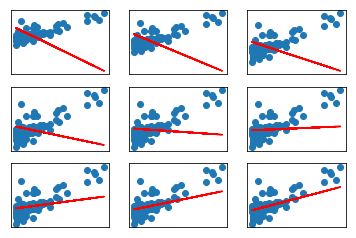

In [288]:
w = np.array([-0.1941133,  -2.07505268]) # np.random.randn(2)

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return yhat

def batch_gradient_descent(X, Y, w, eta=0.1):
    N = len(X)
    yhat = predict(w, X)
    delta =  Y - yhat
    w_delta = 2/N * np.sum(-delta * X)
    b_delta = 2/N * np.sum(-gamma)
    
    w[1:] = w[1:] - eta * w_delta
    w[0] = w[0] - eta * b_delta
    return w

for i in range(1, 10):
    
    w = batch_gradient_descent(X, Y, w)
    
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()

# Stochastic Gradient Descent

SGD의 경우는 완전 반대로 weights(parameters) 업데이트를 각각의 traning data $ x^{(i)} $ 그리고 label $ y^{(i)} $마다 합니다.

$ \theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}; y^{(i)}) $

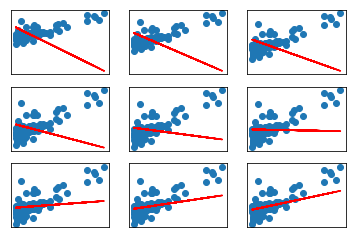

In [290]:
w = np.array([-0.1941133,  -2.07505268])

def sgd(X, Y, w, eta=0.1):
    N = len(X)
    for i in range(N):
        x = X[i]
        y = Y[i]
        yhat = predict(w, x)
        delta = y - yhat

        w_delta = 2/N * np.sum(-delta * x)
        b_delta = 2/N * np.sum(-delta)
        
        w[1:] = w[1:] - eta * w_delta
        w[0] = w[0] - eta * b_delta
    return w
    

for i in range(1, 10):
    w = sgd(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()

# Momemtum

$$ v_t = \gamma v_{t-1} + \eta \nabla_\theta J( \theta) $$

### Potential Energy

* [Potential Energy Lecture](http://people.umass.edu/kastor/energy/pdflectures/Lecture-3.pdf)

먼저 Momentum을 이해하기 위해서는 물리학에서 사용되는 Potential Energy라는 개념을 알고 있어야 합니다.<br>
산꼭대기의 돌맹이 자체에는 kinetic energy가 없지만, 밀어서 절벽으로 떨어뜨리면 kinetic energy가 생기게 됩니다. <br>
이 경우에 돌맹이에 potential energy가 있다고 말할수 있습니다.

$$ PE = mgh $$

* **m:** 돌맹이의 mass
* **h:** 지표면에서 얼마나 높이 떨어져있는지.. height
* **g:** Gravitational constant 지구의 중력..

여기서 g를 조금더 설명한다면.. 떨어지는 물체는 $ g = \frac{9.8m}{s^2} $ 같은 가속도가 붙습니다. <br>
가속도는 시간에 따른 속도(velocity)의 변화량 (rate of change) 입니다.<br>
즉.. velocity를 시간으로 나눠준것입니다.

* 속도(velocity)는 acceleration * time 입니다. $ v = a \cdot t $ 
* 가속도(acceleration)은 velocity/time 입니다. $ a = \frac{v}{t} $

**뉴턴의 제2법칙**

$$ F =m \cdot a $$

* **F:** 힘(force)
* **m:** Mass
* **a:*** Acceleration

여기에서 gravitational force로 보면.. 

$$ F = m \cdot g $$

### Momentum Update

negative gradient는 양옆 가파른 산골짜기의 한쪽을 타고 조금씩 내려오는 형태와 유사하기 때문에 SGD는 convergence까지 매우 느립니다. (특히 초기 steep gain이후에 계속해서 더 느려짐) 



<img src="images/ravine.jpeg">

0.00135387842702
-0.000884798026248
-0.00034845595861
0.00041064521712
-0.00107499271942
-0.000168814172923
-0.000165996085522
-0.000344288558708
-0.000518565564442
-0.00308595484997
-0.00209792273593
-0.0166614754002
-0.00207893701625
-7.59754016269e-05
-0.00282145302301
-0.00255207331433
-0.000824669575837
-0.00385683541282
-0.00103487066568
-0.000266894759361
-0.00140785129529
-0.0617215044534
-0.00210451871766
-0.000854773067711
-0.00228202577069
-0.0506881970202
-0.00974955919018
-0.0026584118022
-0.011451158015
-0.0782710089551
-0.00393402669634
-0.000481332000226
-0.00104941698288
-0.00201504244836
-8.01617130575e-06
-2.43219051831e-05
-7.02076924298e-06
-0.00206051883765
-0.00780902221606
-0.000745296147375
-0.0031137636914
-0.000550793614659
-0.00325972258414
-0.00203203897975
2.70377251545e-05
-0.000700920946303
-0.00234729521285
-0.00211508232161
-0.0041487359157
-0.00272396394338
1.05582500847e-05
-0.00289448431643
-0.000183895201996
-7.55953891012e-05
-0.00145856909638
-0.

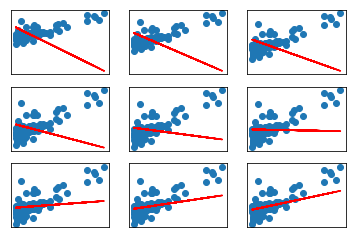

In [294]:
w = np.array([-0.1941133,  -2.07505268])

def momentum_nn(X, Y, w, eta=0.1):
    N = len(X)
    mu = np.zeros(w.shape)
    for i in range(N):
        x = X[i]
        y = Y[i]
        yhat = predict(w, x)
        delta = y - yhat

        w_delta = 2/N * np.sum(-delta * x)
        b_delta = 2/N * np.sum(-delta)
        update = eta * w_delta
        
        w[1:] = w[1:] - update
        w[0] = w[0] - eta * b_delta
    return w
    

for i in range(1, 10):
    w = momentum_nn(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()